<a href="https://colab.research.google.com/github/dprzek/esg/blob/main/esg_adash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# biblioteki i pakiety
import numpy as np
import statsmodels.api as sm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

Ładowanie syntetycznych danych z załączonej CSV-ki

In [2]:
data = pd.read_csv("esg_data.csv", sep = ';') 
data.head()

,entity_id,year,construction_year,capital_renovation_year,emission_CO2,emission_CH4,emission_SO2,power_thermal,power_electrical,no_boilers_fluidized,no_boilers_water,no_boilers_steam,fuel_coal_mio_t,fuel_gas_mio_m3,fuel_oil_mio_l,filter_coverage
0,1001,2017,1954,2008,232.672663,3.618711,1.097147,1400,386,2,2,1,1.0,500,400,0.89
1,1001,2018,1954,2008,230.728456,3.534175,0.944533,1400,386,2,2,1,1.0,500,400,0.89
2,1001,2019,1954,2008,234.708260,3.674400,1.021560,1400,386,2,2,1,1.0,500,400,0.89
3,1001,2020,1954,2008,257.536767,3.700645,0.987547,1400,386,2,2,1,1.0,500,400,0.89
4,1001,2021,1954,2008,228.861484,4.106222,1.206645,1500,400,2,1,2,1.0,500,440,0.93


**Pierwszy** element analityczny: regresja

In [24]:
model = sm.OLS(data["emission_CO2"],
               sm.add_constant(data[['year', 'construction_year', "capital_renovation_year",
                                    "power_thermal","power_electrical","no_boilers_fluidized",
                                    "no_boilers_water","no_boilers_steam","fuel_coal_mio_t",
                                    "fuel_gas_mio_m3","fuel_oil_mio_l","filter_coverage"]]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           emission_CO2   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     178.4
Date:                Wed, 18 May 2022   Prob (F-statistic):           1.68e-76
Time:                        12:25:52   Log-Likelihood:                -614.60
No. Observations:                 148   AIC:                             1255.
Df Residuals:                     135   BIC:                             1294.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Drugi** element analityczny: wizualizacja kmeans

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


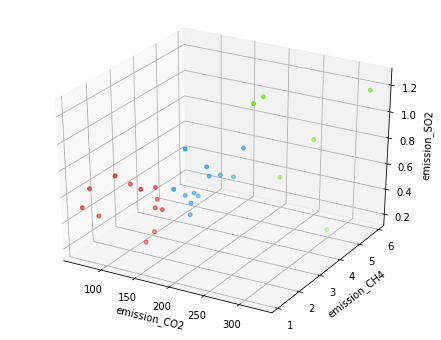

In [34]:
data_ly = data[data['year'] == 2021]

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
data_ly['cluster'] = kmeans.fit_predict(data_ly[["emission_CO2","emission_CH4","emission_SO2"]])

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
data_ly['c'] = data_ly.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# plot
fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(data_ly.emission_CO2, data_ly.emission_CH4, data_ly.emission_SO2, c=data_ly.c, s=15)

ax.set_xlabel('emission_CO2')
ax.set_ylabel('emission_CH4')
ax.set_zlabel('emission_SO2')

plt.show()

**Trzeci** element analityczny: boxploty

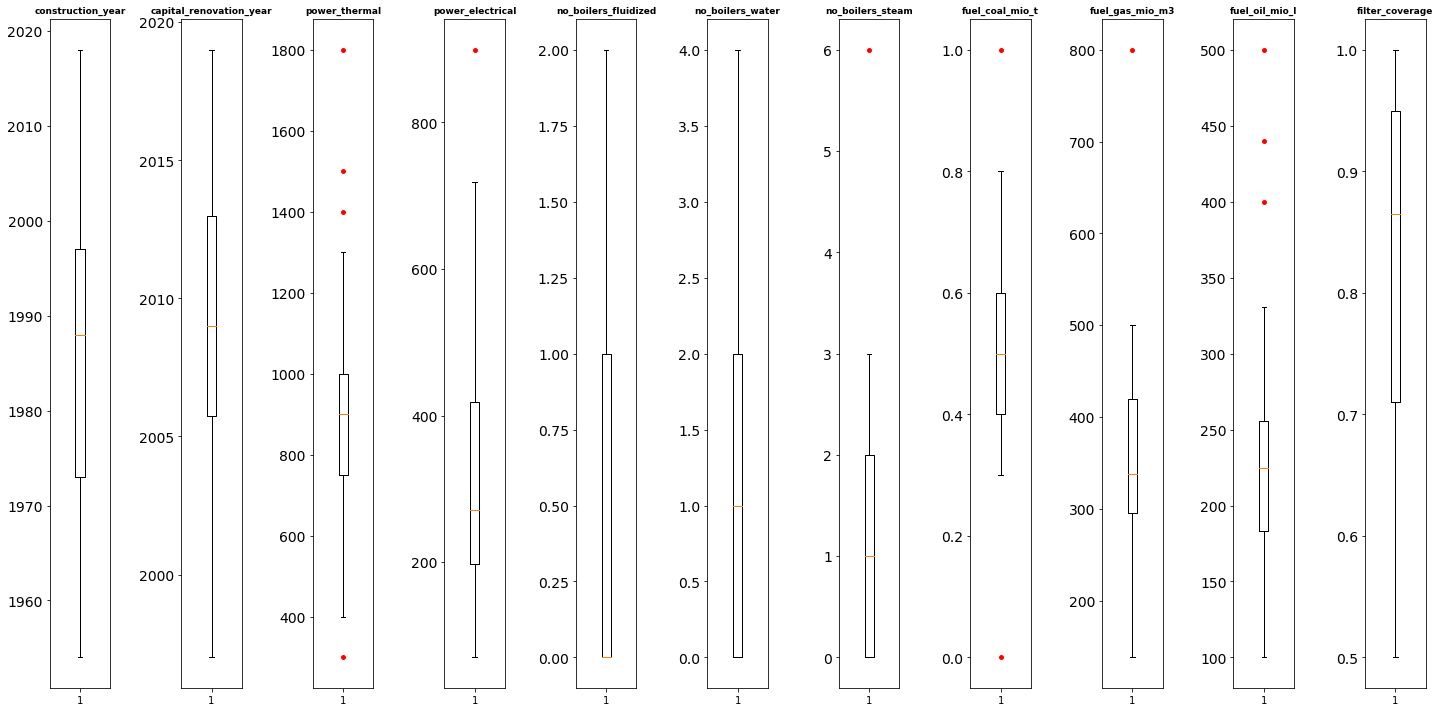

In [47]:
data_b = data[["construction_year","capital_renovation_year","power_thermal",
               "power_electrical","no_boilers_fluidized","no_boilers_water",
               "no_boilers_steam","fuel_coal_mio_t","fuel_gas_mio_m3",
               "fuel_oil_mio_l","filter_coverage"]]

#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(data_b.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(data_b.iloc[:,i], flierprops=red_circle)
    ax.set_title(data_b.columns[i], fontsize=9, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()